## Nuvem de Palavras

Uma nuvem de palavras (ou wordcloud) é uma forma, puramente visual, de se enxergar qual a frequência de algumas palavras num determinado texto ou documento, ou um conjunto qualquer de palavras. Nessa nuvem as palavras que aparecem mais acabam sendo maiores que as outras, e as que aparecem menos ficam menores. Abaixo vamos carregar as bibliotecas que serão usadas.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Agora um "texto" será criado, você pode alterar as palavras e colocar qualquer conjunto que queira.

In [0]:
texto=("Natal Calor Sol Quente Calor Praia IMD IMD Calor Natal Tecnologia Digital Tecnologia Praia Praia Sol Verão Verão Verão Calor Calor Quente Quente Quente Quente IMD Sol Sol Calor Calor Calor Calor Digital IMD Verão Praia Praia Litoral Litoral Praia Calor Sol IMD Quente Vulcão")

Com o texto carregado, podemos agora passar para a função que cria a nuvem de palavras. É interessante notar que podemos passar como parâmetros o tamanho da imagem que será feita, no exemplo abaixo está em 550 por 550 e isso pode ser alterado, além disso também é possível alterar a cor de fundo, por padrão é preto mas no exemplo foi colocado o "skyblue".

In [0]:
wordcloud = WordCloud(width=550, height=550, margin=0, background_color="skyblue").generate(texto)

Em seguida vamos ver o que foi criado

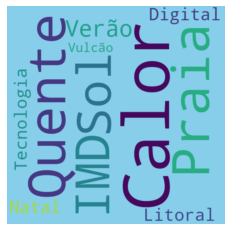

In [5]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Gráfico de Densidade

O gráfico de densidade mostra qual é a distribuição dos dados de um determinado conjunto, é uma forma de se entender rapidamente como os valores se comportam. No exemplo abaixo os valores são criados aleatoriamente (de novo), mas podem ser substituídos por qualquer conjunto de valores que queira.

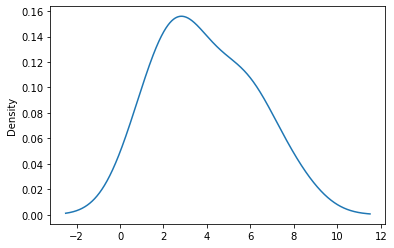

In [6]:
import pandas as pd

s = pd.Series([1, 1.1, 2.3, 2.4, 2.5, 3, 3.5, 4, 5, 5.5, 6.2, 6.3, 8])
ax = s.plot.kde()

Do gráfico acima podemos concluir que a maior parte dos valores se concentram entre 2 e 4, e ao longo do desenho essa frequência vai diminuindo. Em algumas ocasiões pode ser interessante plotar dois gráficos diferentes na mesma figura, isso é possível com o Pandas, a seguir um exemplo ilustra isso.

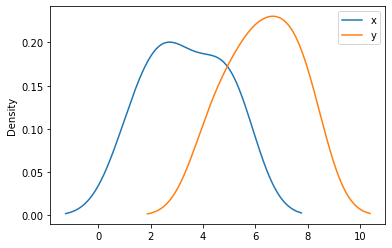

In [7]:
df = pd.DataFrame({
    'x': [1, 1.5, 2, 2.5, 2.5, 3, 3.5, 4, 4.5, 5, 5.2, 5.5],
    'y': [4, 4.5, 5, 5.5, 6, 6, 6.5, 7, 7.2, 7.5, 8, 8.25],
    })
ax = df.plot.kde()

## Curvas de Nível

Nesse tipo de visualização cada curva representa um determinado valor da amostra.

[0.15 0.3  0.45 0.6  0.75 0.9 ]


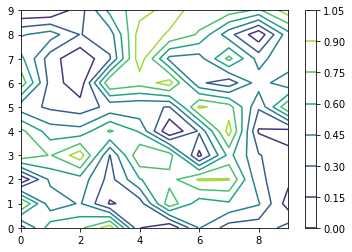

In [8]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.ticker as ticker

x = np.arange(10)
y = np.arange(10)
z = np.random.random((10,10))

pl.figure()
pl.contour(x, y, z)
pl.colorbar()

# manually calculate levels:
zmin = np.amin(z)
zmax = np.amax(z)

N = 7 # default
locator = ticker.MaxNLocator(N+1)
lev = locator.tick_values(zmin, zmax)

# Clip
levels = lev[(lev > zmin) & (lev < zmax)]

print(levels)

## Mapa de Calor

No mapa de calor as cores têm um papel fundamental no entendimento dos dados, normalmente cores mais frias (azul, preto, cinza) representam dados que aparecem com menos frequência, já as cores quentes (vermelho, larajna, amarelo) nos apontam dados que aparecem mais, a seguir é mostrado um exemplo. No exemplo abaixo é mostrado, com valores fictícios, a quantidade de alunos que se formaram ao longo dos anos em diferentes cursos da UFRN.

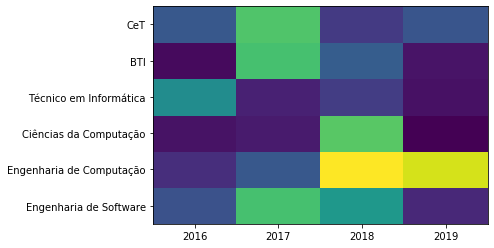

In [9]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

Index= ['Engenharia de Software', 'Engenharia de Computação', 'Ciências da Computação', 'Técnico em Informática', 'BTI', 'CeT']
Cols = ['2016', '2017', '2018', '2019']
df = DataFrame(abs(np.random.randn(6, 4)), index=Index, columns=Cols)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

## Distribuições Discretas

A distribuição discreta descreve a probabilidade de ocorrência de valores de uma variável aleatória discreta, uma variável desse tipo possui valores contáveis, como uma lista de inteiros, a quantidade de meses num ano, a quantidade de alunos numa escola, a quantidade de objetos numa lista, etc. Dessa forma, cada valor possível da variável pode ser associado a uma probabilidade diferente de zero.

## Distribuição Uniforme

Nesse caso todas as variáveis tem iguais chances de ocorrer, portanto, o gráfico se torna um "retângulo".

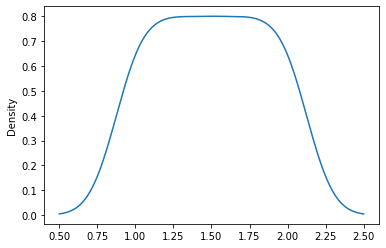

In [10]:
import pandas as pd

s = pd.Series([1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2])
ax = s.plot.kde()

## Distribuição Normal

Na probabilidade a distribuição normal (ou Gaussiana) é um caso comum de distribuição de probabilidade contínua. É observada com bastante frequência na natureza e nas ciências sociais, representando variáveis aleatórias reais.

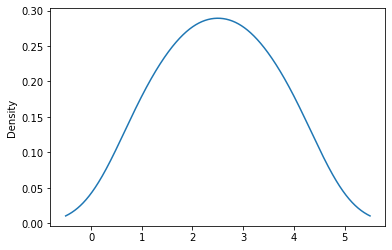

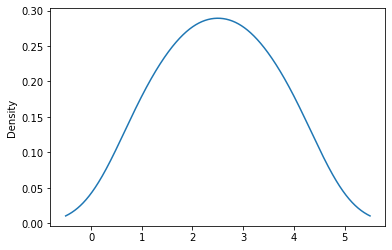

In [11]:
import pandas as pd

s = pd.Series([1,1,2,2,2,3,3,3,4,4])
ax = s.plot.kde()

É possível observar na figura acima que a distribuição é perfeita, não há deslocamento da curva pra nenhum dos lados, e isso representa bem o comportamento dos dados que foram plotados. Na natureza esse comportamento também é observado, é claro que existem desvios pra esquerda ou direita, mas na maioria dos casos esses desvios são mínimos e a distribuição dos dados pode ser analisada como uma distribuição normal (ou Gaussiana).

## Distribuição Bimodal

Essa distribuição é semelhante a que foi apresentada anteriormente, porém apresenta dois "picos", e isso mostra que os dados possui uma distribuição que tem dois agrupamentos diferentes de valores. Abaixo as bibliotecas serão carregadas, e em seguida o conjunto de dados será carregado.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [13]:
dados_url = 'http://bit.ly/2cLzoxH'
dados = pd.read_csv(dados_url)
dados.head(n=10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


(22.0, 90.0)

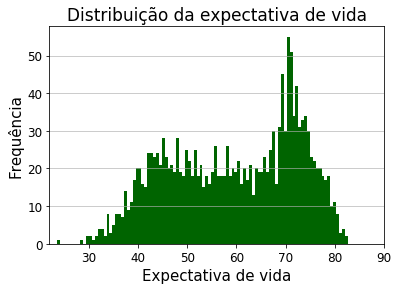

In [14]:
dados['lifeExp'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12, 
                     color = 'darkgreen')
plt.title("Distribuição da expectativa de vida", fontsize = 17)
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.grid(axis = 'y', alpha = 0.8)
plt.xlim([22.0,90.0])

O gráfico acima já foi mostrado num tutorial anterior, porém é muito relevante, pois apresenta duas concentrações de dados em torno dos 40 (anos) aproximadamente e outra próxima aos 70 (anos). Existem interpretações que podem ser feitas olhando apenas um gráfico, no exemplo mostrado os dados são de expectativa de vida em diferentes continentes, então uma possível interpretação da dupla concentração de valores seria a diferença de qualidade de vida entre os mais ricos e mais pobres no mundo.